In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
train_path = "/content/drive/MyDrive/Dataset/TRAIN"
val_path = "/content/drive/MyDrive/Dataset/VAL"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import requests
import os

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/TRAIN',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 312 images belonging to 2 classes.


In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Dataset/VAL',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2 
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 239s 28s/step - loss: 1.4234 - accuracy: 0.4930 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 66s 8s/step - loss: 0.6239 - accuracy: 0.6888 - val_loss: 0.4805 - val_accuracy: 0.9167
Epoch 3/15
8/8 [==============================] - 64s 8s/step - loss: 0.4848 - accuracy: 0.7780 - val_loss: 0.4265 - val_accuracy: 0.8833
Epoch 4/15
8/8 [==============================] - 62s 8s/step - loss: 0.3094 - accuracy: 0.8855 - val_loss: 0.3011 - val_accuracy: 0.9500
Epoch 5/15
8/8 [==============================] - 62s 8s/step - loss: 0.2508 - accuracy: 0.9156 - val_loss: 0.2687 - val_accuracy: 0.9000
Epoch 6/15
8/8 [==============================] - 62s 8s/step - loss: 0.2563 - accuracy: 0.9253 - val_loss: 0.2102 - val_accuracy: 0.9667
Epoch 7/15
8/8 [==============================] - 62s 8s/step - loss: 0.1993 - accuracy: 0.9433 - val_loss: 0.1732 - val_accuracy: 0.9500
Epoch 8/15
8/8 [================

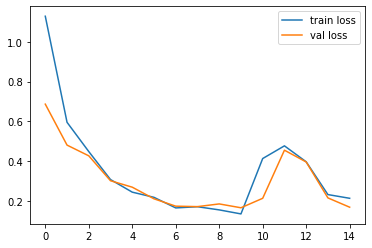

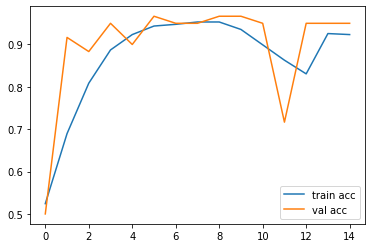

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_test = []
y_actual = []

In [ ]:
#prediction
for i in os.listdir("/content/drive/MyDrive/Dataset/VAL/NORMAL"):
  img = image.load_img("/content/drive/MyDrive/Dataset/VAL/NORMAL/"+ i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#prediction
for i in os.listdir("/content/drive/MyDrive/Dataset/VAL/COVID"):
  img = image.load_img("/content/drive/MyDrive/Dataset/VAL/COVID/"+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

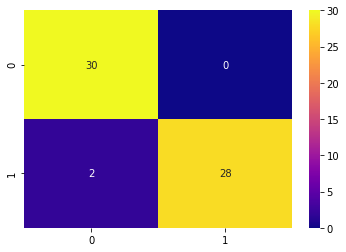

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)
import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)

In [ ]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Dataset/TEST/COVID/covid-19-pneumonia-30-PA.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.006504]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/mymodel.hdf5')

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/MyDrive/mymodel.hdf5')
  return model
model=load_model()
st.write
(
 """
 ### COIVD detector
 
 """   
)


file = st.file_uploader("Please upload an XRAY image", type=["jpg", "jpeg","png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
  size = (224,224)
  image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]
  prediction = model.predict(img_reshape)

  return prediction
if file is None:
  st.text("")
else:
  image = Image.open(file)
  st.image(image, use_column_width=True)
  predictions = import_and_predict(image, model)
  class_names=['COVID -ve','COVID +ve']
  if predictions[0]<0.5:
    st.success(class_names[1])
  else:
    st.success(class_names[0])

    

Overwriting app.py


In [ ]:
!ls

In [ ]:
!ngrok authtoken 1s4WUoCnsZdONjA1cFM28kDrtf7_RFGCP2AMcFbKHsEV5D6v

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!cat /content/nohup.out

2021-05-27 05:07:12.541020: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.100.202:8501

2021-05-27 05:07:14.526730: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-27 05:07:14.538192: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-27 05:07:14.538240: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (153659f21312): /proc/driver/nvidia/version does not exist
2021-05-27 05:07:14.538984: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in pe

In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "http://6d8251027a98.ngrok.io" -> "http://localhost:8501">

In [ ]:
ngrok.kill()